# 1. Carga y Preprocesamiento de Datos
## 1.1 Importar librerías y leer el CSV

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("df_estandarizado.csv")

## 1.2 Inspección inicial
* Diccionario de datos
* Verificar tipos de datos y valores nulos (df.info(), df.isnull().sum()).
* Corregir tipos de columnas (por ejemplo, Charges.Total a float).

Diccionario de datos
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa gender:
* género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes Charges.
* Total: total gastado por el cliente
* Cuentas_Diarias: total pagado por día en un mes

In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.gender            7032 non-null   int64  
 2   customer.SeniorCitizen     7032 non-null   int64  
 3   customer.Partner           7032 non-null   int64  
 4   customer.Dependents        7032 non-null   int64  
 5   customer.tenure            7032 non-null   float64
 6   phone.PhoneService         7032 non-null   int64  
 7   phone.MultipleLines        7032 non-null   int64  
 8   internet.InternetService   7032 non-null   int64  
 9   internet.OnlineSecurity    7032 non-null   int64  
 10  internet.OnlineBackup      7032 non-null   int64  
 11  internet.DeviceProtection  7032 non-null   int64  
 12  internet.TechSupport       7032 non-null   int64  
 13  internet.StreamingTV       7032 non-null   int64

,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


## 1.3 Definir variables

In [23]:
X = df.drop(["Churn"], axis=1)
X

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0,0,1,1,-0.954296,1,0,0,0,2,0,2,2,0,1,1,3,0.026652,-0.745607,0.026652
1,1,0,0,0,-0.954296,1,2,0,0,0,0,0,0,2,0,0,3,-0.162819,-0.768063,-0.162819
2,1,0,0,0,-1.158016,1,0,1,0,0,2,0,0,0,0,1,2,0.302548,-0.883456,0.302548
3,1,1,1,0,-0.791321,1,0,1,0,2,2,0,2,2,0,1,2,1.103642,-0.461240,1.103642
4,0,1,1,0,-1.198760,1,0,1,0,0,0,2,2,0,0,1,3,0.634952,-0.889390,0.634952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,-0.791321,1,0,0,2,0,0,2,0,0,1,0,3,-0.320711,-0.679605,-0.320711
7028,1,0,1,0,-0.424625,1,2,1,0,0,0,0,0,2,0,1,2,0.674841,-0.180711,0.674841
7029,1,0,0,0,-1.239504,1,0,0,0,2,0,0,0,0,0,1,3,-0.481927,-0.966443,-0.481927
7030,1,0,1,1,1.408853,1,0,0,2,0,2,2,0,2,2,0,3,0.101443,1.034298,0.101443


In [24]:
# Yes: 1, No: 0
y = df["Churn"]
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7027,0
7028,1
7029,0
7030,0


## 1.4 Separar variables numéricas y categóricas

In [25]:
numeric_features = ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "Cuentas_Diarias"]
numeric_features

['customer.tenure',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'Cuentas_Diarias']

In [26]:
categorical_features = [c for c in X.columns if c not in numeric_features]
categorical_features

['customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod']

## 1.5 Construir transformador
El siguiente paso debería ser la transformación de las variables numéricas, usando por ejemplo StandardScale, y las variables categóricas usando OneHotEncoder, pero esto se hizo en la primera parte del desafío Telecom X

Ejemplo de código

*** numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", sparse=False) ***

*** preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
]) ***

# 2. Análisis de Correlación y Selección de Variables

## 2.1 Matriz de correlación de variables numéricas
Para entender las relaciones lineales entre variables continuas y la variable objetivo Churn, calculamos la matriz de correlación.

In [17]:
# Selección de numéricas + objetivo
cols_corr = numeric_features + ["Churn"]
corr_matrix = df[cols_corr].corr()

# Mostrar matriz
print(corr_matrix)

                         customer.tenure  account.Charges.Monthly  \
customer.tenure                 1.000000                 0.246862   
account.Charges.Monthly         0.246862                 1.000000   
account.Charges.Total           0.825880                 0.651065   
Cuentas_Diarias                 0.246862                 1.000000   
Churn                          -0.354049                 0.192858   

                         account.Charges.Total  Cuentas_Diarias     Churn  
customer.tenure                       0.825880         0.246862 -0.354049  
account.Charges.Monthly               0.651065         1.000000  0.192858  
account.Charges.Total                 1.000000         0.651065 -0.199484  
Cuentas_Diarias                       0.651065         1.000000  0.192858  
Churn                                -0.199484         0.192858  1.000000  


## 2.2 Heatmap para detectar colinealidad
Visualizar la matriz con un heatmap nos permite localizar rápidamente pares de variables cuyo coeficiente |r| > 0.8.

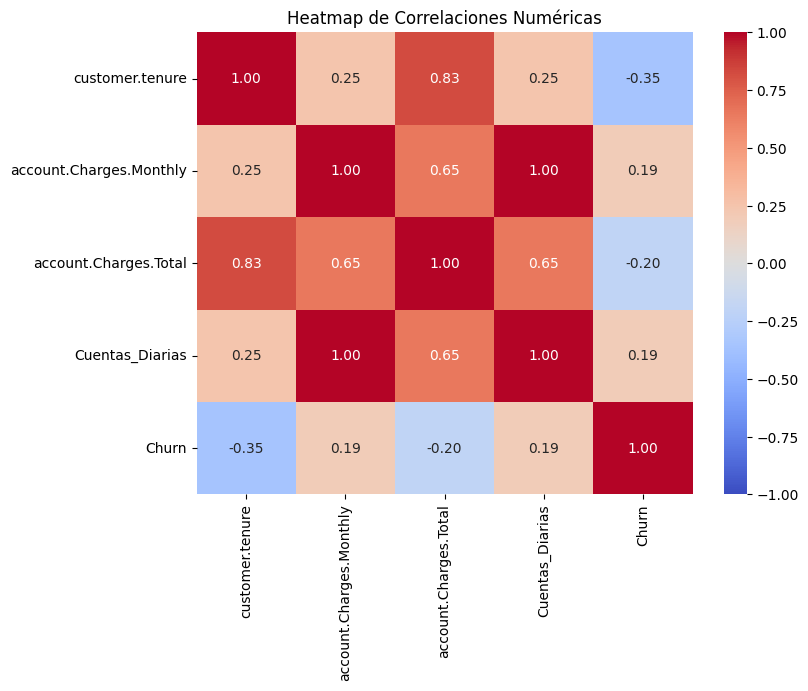

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap de Correlaciones Numéricas")
plt.show()

Después de los resultados se debe eliminar Cuentas_Diarias porque está coalineado con Charges.Monthly, ya que deriva de esa columna.

También la duración del contrato (customer.tenure) está alineada con account.Charges.Total ya que mientras más dura el contrato más es lo que se ha cobrado, así que se debe eliminar la columna Charges.Total

In [27]:
df_limpio = df.drop(["Cuentas_Diarias", "account.Charges.Total"], axis=1)

In [97]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.SeniorCitizen     7032 non-null   int64  
 2   customer.Partner           7032 non-null   int64  
 3   customer.Dependents        7032 non-null   int64  
 4   customer.tenure            7032 non-null   float64
 5   internet.InternetService   7032 non-null   int64  
 6   internet.OnlineSecurity    7032 non-null   int64  
 7   internet.OnlineBackup      7032 non-null   int64  
 8   internet.DeviceProtection  7032 non-null   int64  
 9   internet.TechSupport       7032 non-null   int64  
 10  internet.StreamingTV       7032 non-null   int64  
 11  internet.StreamingMovies   7032 non-null   int64  
 12  account.Contract           7032 non-null   int64  
 13  account.PaperlessBilling   7032 non-null   int64

In [29]:
# Se limpia el set de variables numéricas
numeric_features = ["customer.tenure", "account.Charges.Monthly"]
numeric_features

['customer.tenure', 'account.Charges.Monthly']

In [96]:
categorical_features

['customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod']

## 2.3 Análisis de variables categóricas

### 2.3.1 Prueba de chi-cuadrado
Se realiza para cada variable categórica contra Churn y así descartar categorías con nula asociación estadística.

In [98]:
from scipy.stats import chi2_contingency

chi2_results = []
for col in categorical_features:
    contingency = pd.crosstab(df[col], df["Churn"])
    chi2, p, dof, _ = chi2_contingency(contingency)
    chi2_results.append((col, chi2, p))

chi2_df = pd.DataFrame(chi2_results, columns=["feature", "chi2", "p_value"])
print(chi2_df.sort_values("p_value"))

                      feature         chi2        p_value
13           account.Contract  1179.545829  7.326182e-257
7     internet.OnlineSecurity   846.677389  1.400687e-184
10       internet.TechSupport   824.925564  7.407808e-180
6    internet.InternetService   728.695614  5.831199e-159
15      account.PaymentMethod   645.429900  1.426310e-139
8       internet.OnlineBackup   599.175185  7.776099e-131
9   internet.DeviceProtection   555.880327  1.959389e-121
12   internet.StreamingMovies   374.268432   5.353560e-82
11       internet.StreamingTV   372.456502   1.324641e-81
14   account.PaperlessBilling   256.874908   8.236203e-58
3         customer.Dependents   186.321639   2.019659e-42
1      customer.SeniorCitizen   158.440816   2.479256e-36
2            customer.Partner   157.503151   3.973798e-36
5         phone.MultipleLines    11.271541   3.567927e-03
4          phone.PhoneService     0.873733   3.499240e-01
0             customer.gender     0.475455   4.904885e-01


Según resultado en el desafio anterior el género no aporta explicación para el Churn, pero si el método de pago (automático vs manual) y el tipo de contrato (largo plazo dos años es mucho menor el Churn). Basado en estos resultados y los de Chi2, se eliminarán las siguientes variables

* customer.gender
* phone.PhoneService
* phone.MultipleLines

In [99]:
categorical_features = ['customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod']
categorical_features

['customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod']

In [103]:
cat_var = categorical_features
cat_var

['customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod']

In [104]:
# Función para plotear distribución de churn por categoría
def plot_churn_by_category(df_limpio, cat_var):
    # Aplica mapeo si corresponde
    if cat_var == 'account.Contract':
        df_plot = df_limpio.copy()
        df_plot[cat_var] = df_plot[cat_var].map(contract_map)
    elif cat_var == 'account.PaymentMethod':
        df_plot = df_limpio.copy()
        df_plot[cat_var] = df_plot[cat_var].map(payment_map)
    elif cat_var == 'customer.gender':
        df_plot = df_limpio.copy()
        df_plot[cat_var] = df_plot[cat_var].map(gender_map)
    elif cat_var == 'Churn':
        df_plot = df_limpio.copy()
        df_plot[cat_var] = df_plot[cat_var].map(churn_map)
    else:
        df_plot = df_limpio.copy()

    df_plot['Churn'] = df_plot['Churn'].map(churn_map)

    plt.figure(figsize=(6,4))
    ct = pd.crosstab(df_plot[cat_var], df_plot['Churn'], normalize='index') * 100
    ct.plot(kind='bar',
            stacked=True,
            colormap='Set2',
            edgecolor='k')

    plt.title(f"% Churn según {cat_var.replace('_',' ').title()}")
    plt.ylabel("Porcentaje de clientes")
    plt.xticks(rotation=90, ha='right')

    for i, category in enumerate(ct.index):
        for j, churn_label in enumerate(ct.columns):
            pct = ct.loc[category, churn_label]
            plt.text(
                x = i,
                y = ct.iloc[i, :j].sum() + pct/2,
                s = f"{pct:.1f}%",
                ha='center',
                va='center',
                color='white',
                fontsize=10
            )

    plt.legend(title="Status de churn", bbox_to_anchor=(1.0, 1.0))
    plt.tight_layout()
    plt.show()

In [105]:
# Diccionarios de mapeo
contract_map = {
    0: 'Month-to-month',
    1: 'One year',
    2: 'Two year'
}

payment_map = {
    0: 'Bank transfer (automatic)',
    1: 'Credit card (automatic)',
    2: 'Electronic check',
    3: 'Mailed check'
}

gender_map = {
    0: 'Female',
    1: 'Male'
}

churn_map = {
    0: 'Permaneció',
    1: 'Se dio de baja'
}

<Figure size 600x400 with 0 Axes>

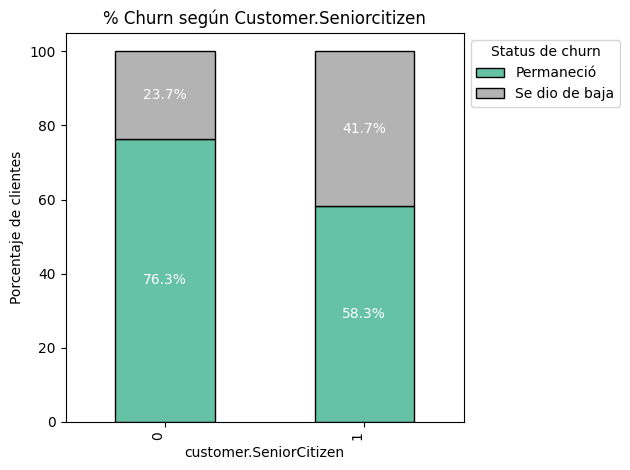

<Figure size 600x400 with 0 Axes>

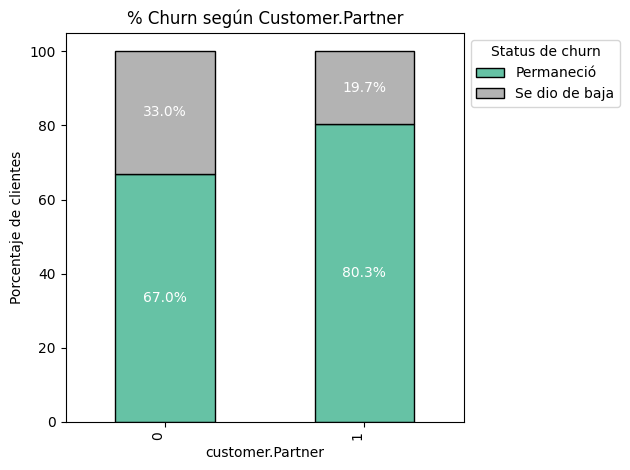

<Figure size 600x400 with 0 Axes>

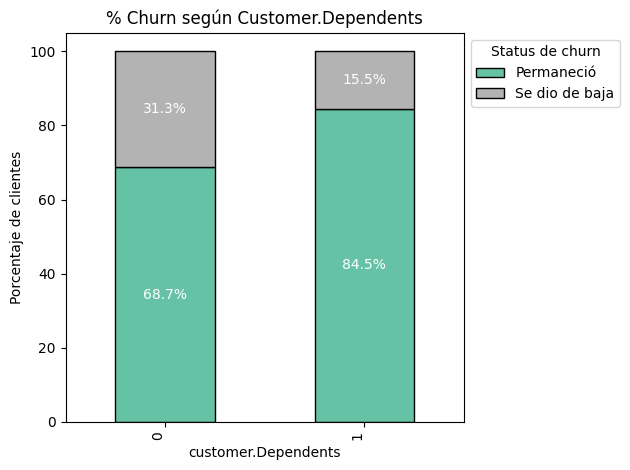

<Figure size 600x400 with 0 Axes>

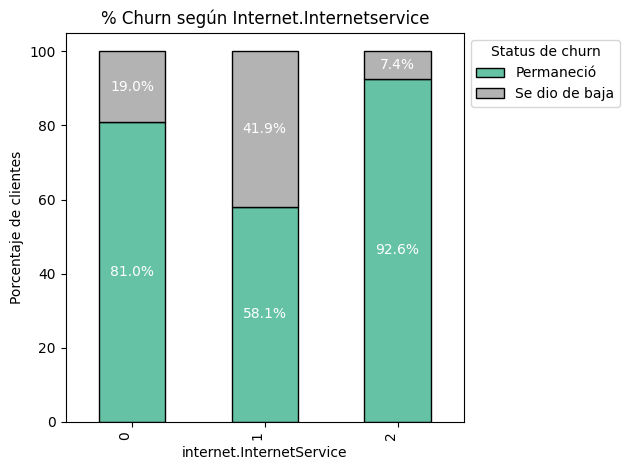

<Figure size 600x400 with 0 Axes>

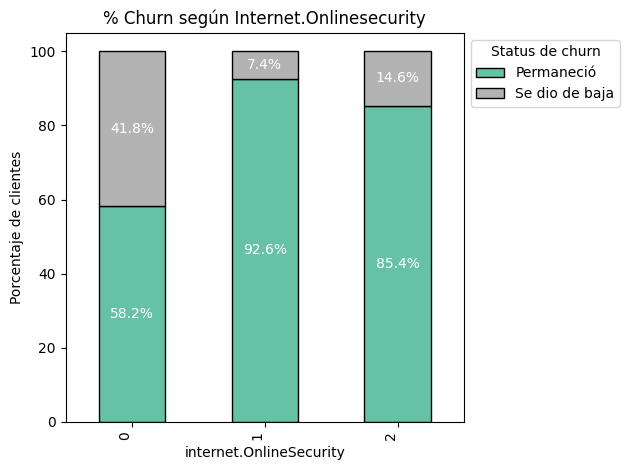

<Figure size 600x400 with 0 Axes>

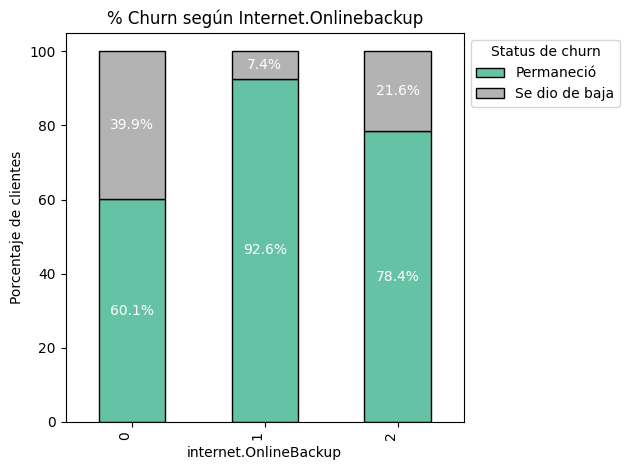

<Figure size 600x400 with 0 Axes>

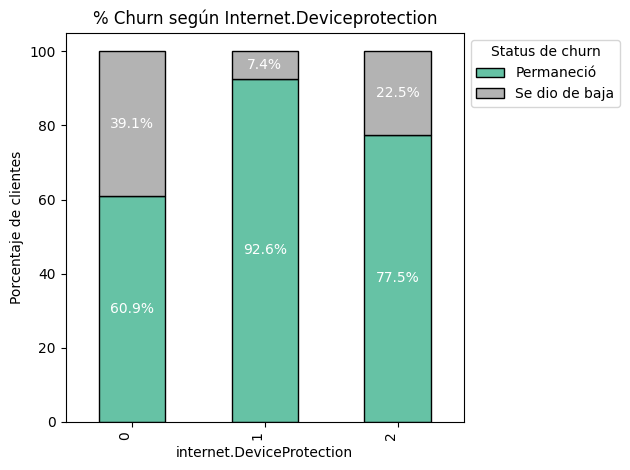

<Figure size 600x400 with 0 Axes>

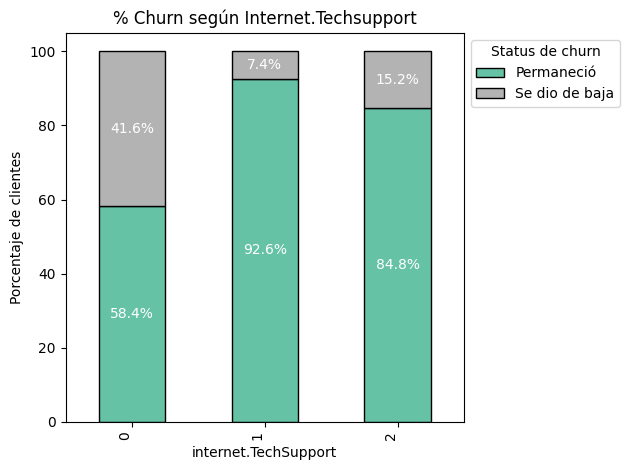

<Figure size 600x400 with 0 Axes>

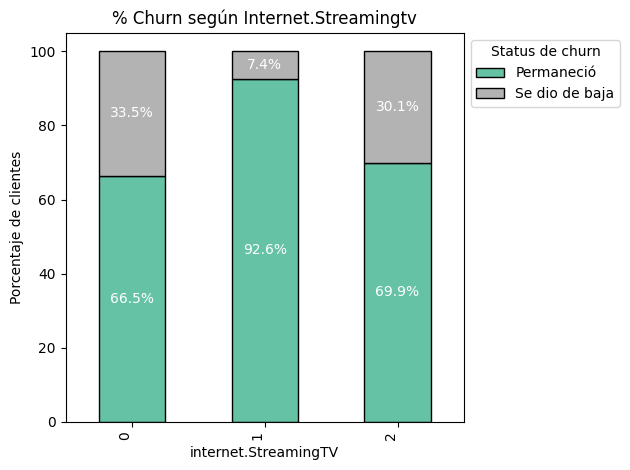

<Figure size 600x400 with 0 Axes>

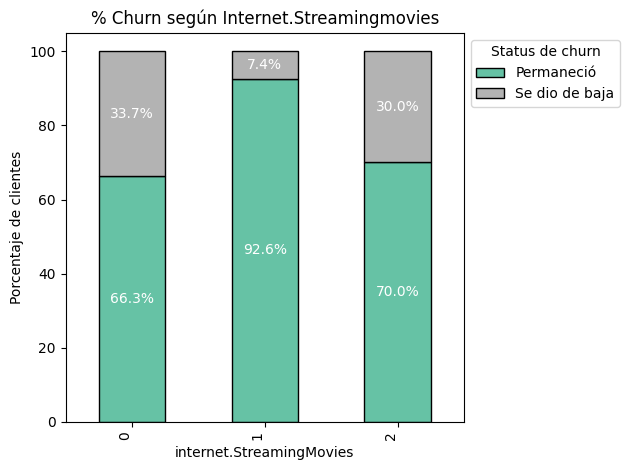

<Figure size 600x400 with 0 Axes>

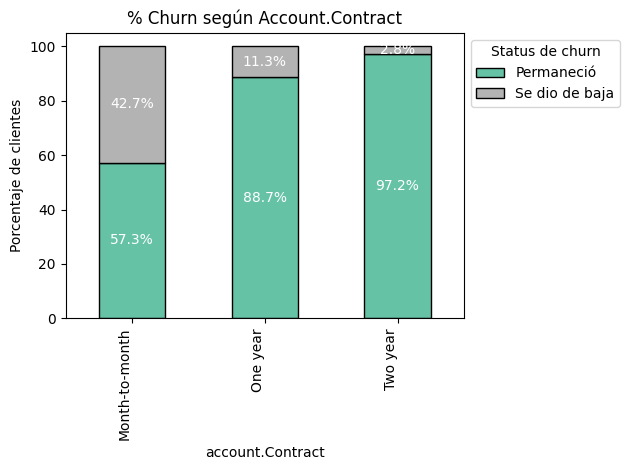

<Figure size 600x400 with 0 Axes>

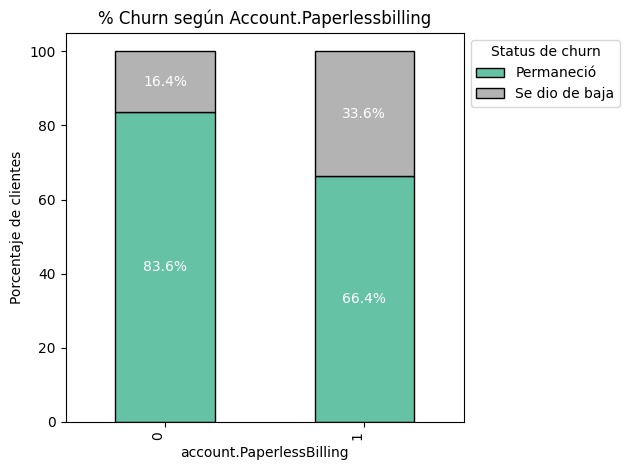

<Figure size 600x400 with 0 Axes>

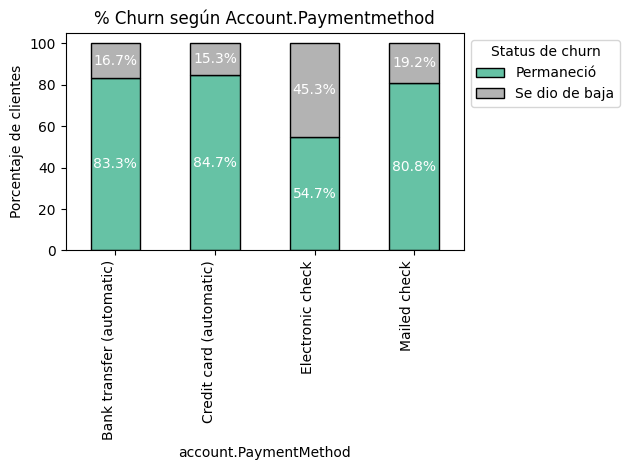

In [106]:
for var in cat_var:
    plot_churn_by_category(df_limpio, var)

In [37]:
# Eliminar variables categóricas con poco aporte a la expliacion del Churn
df_limpio = df.drop(["customer.gender", "phone.PhoneService", "phone.MultipleLines"], axis=1)

In [107]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer.SeniorCitizen     7032 non-null   int64  
 2   customer.Partner           7032 non-null   int64  
 3   customer.Dependents        7032 non-null   int64  
 4   customer.tenure            7032 non-null   float64
 5   internet.InternetService   7032 non-null   int64  
 6   internet.OnlineSecurity    7032 non-null   int64  
 7   internet.OnlineBackup      7032 non-null   int64  
 8   internet.DeviceProtection  7032 non-null   int64  
 9   internet.TechSupport       7032 non-null   int64  
 10  internet.StreamingTV       7032 non-null   int64  
 11  internet.StreamingMovies   7032 non-null   int64  
 12  account.Contract           7032 non-null   int64  
 13  account.PaperlessBilling   7032 non-null   int64

# 2.4 Eliminación de variables poco útiles o problemáticas

## 2.4.1 Umbral de varianza mínima

In [108]:
from sklearn.feature_selection import VarianceThreshold

# Mantener columnas con varianza > 0.01 en los datos numéricos
selector = VarianceThreshold(threshold=0.01)
selector.fit(df_limpio[numeric_features])
low_variance = [f for f, var in zip(numeric_features, selector.variances_) if var <= 0.01]
print("Variables de baja varianza:", low_variance)
print("Variables numéricas:", numeric_features)

Variables de baja varianza: []
Variables numéricas: ['customer.tenure', 'account.Charges.Monthly']


Se confirma la selección de variables numéricas

In [109]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Construir DataFrame solo con numéricas tras drop de baja varianza
df_vif = df_limpio[numeric_features].drop(columns=low_variance).dropna()

# Agregar constante para statsmodels
X_vif = sm.add_constant(df_vif)

vif_data = []
for i, col in enumerate(X_vif.columns):
    vif_val = variance_inflation_factor(X_vif.values, i)
    vif_data.append((col, vif_val))

vif_df = pd.DataFrame(vif_data, columns=["feature", "VIF"])
print(vif_df.sort_values("VIF", ascending=False))

                   feature       VIF
1          customer.tenure  1.064896
2  account.Charges.Monthly  1.064896
0                    const  1.000000


No hay VIF relevante para eliminar variables numéricas. No hay VIF para multicolinealidad grave (VIF > 5).

# 3. División de Datos

Se separa el conjunto de entrenamiento del de pruebas

Se vuelve a construir el DataFrame de las variables Y, con las nuevas modificaciones

In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer.SeniorCitizen     7032 non-null   int64  
 1   customer.Partner           7032 non-null   int64  
 2   customer.Dependents        7032 non-null   int64  
 3   customer.tenure            7032 non-null   float64
 4   internet.InternetService   7032 non-null   int64  
 5   internet.OnlineSecurity    7032 non-null   int64  
 6   internet.OnlineBackup      7032 non-null   int64  
 7   internet.DeviceProtection  7032 non-null   int64  
 8   internet.TechSupport       7032 non-null   int64  
 9   internet.StreamingTV       7032 non-null   int64  
 10  internet.StreamingMovies   7032 non-null   int64  
 11  account.Contract           7032 non-null   int64  
 12  account.PaperlessBilling   7032 non-null   int64  
 13  account.PaymentMethod      7032 non-null   int64

In [111]:
X = df_limpio.drop(["Churn"], axis=1)
X.info()
y = df_limpio['Churn']
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer.SeniorCitizen     7032 non-null   int64  
 1   customer.Partner           7032 non-null   int64  
 2   customer.Dependents        7032 non-null   int64  
 3   customer.tenure            7032 non-null   float64
 4   internet.InternetService   7032 non-null   int64  
 5   internet.OnlineSecurity    7032 non-null   int64  
 6   internet.OnlineBackup      7032 non-null   int64  
 7   internet.DeviceProtection  7032 non-null   int64  
 8   internet.TechSupport       7032 non-null   int64  
 9   internet.StreamingTV       7032 non-null   int64  
 10  internet.StreamingMovies   7032 non-null   int64  
 11  account.Contract           7032 non-null   int64  
 12  account.PaperlessBilling   7032 non-null   int64  
 13  account.PaymentMethod      7032 non-null   int64

Creo los conjuntos de prueba y entrenamiento, pero primero reviso el imbalance de la columna Churn

In [112]:
import pandas as pd

# Suponiendo que ya cargaste tu DataFrame como df
# Conteo de cada clase
churn_counts = df_limpio["Churn"].value_counts()
# Proporciones de cada clase
churn_props = df_limpio["Churn"].value_counts(normalize=True)

print("Conteos:\n", churn_counts)
print("\nProporciones:\n", churn_props)


Conteos:
 Churn
0    5163
1    1869
Name: count, dtype: int64

Proporciones:
 Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


Para corregir este imbalance usaré un oversampling de la variable 1 (abandona el contrato)

In [50]:
# Se instala la biblioteca necesaria para aplicar el método
# pip install imbalanced-learn scikit-learn

Se cargan en el cuaderno

In [113]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

Divide en conjuntos de entrenamiento y prueba manteniendo la proporción inicial.

In [114]:
# Split estratificado para conservar proporciones antes del oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Distribución antes de oversampling:", Counter(y_train))

Distribución antes de oversampling: Counter({0: 3614, 1: 1308})


Aplicar Oversampling con RandomOverSampler. Para duplicar ejemplos de la clase minoritaria hasta igualar la mayoritaria.

In [115]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

print("Distribución tras RandomOverSampler:", Counter(y_res))

Distribución tras RandomOverSampler: Counter({1: 3614, 0: 3614})


Aplicar Oversampling con SMOTE (Synthetic Minority Over-sampling Technique), para generar ejemplos sintéticos interpolando vecinos.

In [116]:
smote = SMOTE(random_state=42, k_neighbors=5)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print("Distribución tras SMOTE:", Counter(y_sm))

Distribución tras SMOTE: Counter({1: 3614, 0: 3614})


# 4. Entrenamiento de Modelos de Clasificación

## 4.1 Regresión Logística

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(random_state=42, class_weight=None)
model.fit(X_sm, y_sm)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1549
           1       0.50      0.81      0.62       561

    accuracy                           0.73      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.80      0.73      0.75      2110

[[1098  451]
 [ 109  452]]


## 4.2 Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instanciar el Random Forest
rf = RandomForestClassifier(
    n_estimators=100,          # número de árboles
    max_depth=None,            # profundidad máxima de cada árbol
    min_samples_split=2,       # min. muestras para dividir un nodo
    min_samples_leaf=1,        # min. muestras en cada hoja
    class_weight='balanced',   # ajustar pesos según desbalance
    random_state=42            # reproducibilidad
)

# Entrenar con los datos balanceados y escalados
rf.fit(X_sm, y_sm)

RandomForestClassifier(class_weight='balanced', random_state=42)

Predicción y métricas de evaluación

In [119]:
# Predecir sobre el set de test
y_pred = rf.predict(X_test)

# Métricas de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1549
           1       0.56      0.65      0.60       561

    accuracy                           0.77      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.78      0.77      0.77      2110

[[1257  292]
 [ 196  365]]


In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5],
    'class_weight': ['balanced', None]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',              # o 'roc_auc' según objetivo
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_sm, y_sm)
print("Mejores parámetros:", grid_rf.best_params_)
print("Mejor f1 en validación:", grid_rf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}
Mejor f1 en validación: 0.8376955635992456


Configuración del modelo con los hiperparámetros óptimos

In [121]:
from sklearn.ensemble import RandomForestClassifier

# Parámetros obtenidos de GridSearchCV
best_params = {
    "n_estimators": 200,
    "max_depth": 20,
    "min_samples_leaf": 1,
    "class_weight": None,
    "random_state": 42
}

# Instanciamos el RandomForest con los mejores hiperparámetros
rf_best = RandomForestClassifier(**best_params)

Reentrenamiento sobre el conjunto balanceado

In [122]:
# X_sm, y_sm: conjunto de entrenamiento preprocesado (SMOTE)
rf_best.fit(X_sm, y_sm)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

Predicción y métricas de evaluación

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predicciones
y_pred_best = rf_best.predict(X_test)
y_proba_best = rf_best.predict_proba(X_test)[:, 1]

# Métricas detalladas
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1549
           1       0.55      0.66      0.60       561

    accuracy                           0.77      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.78      0.77      0.77      2110

Confusion Matrix:
 [[1246  303]
 [ 192  369]]
ROC AUC Score: 0.8207572247749971


In [124]:
import pandas as pd
import numpy as np

# Supongamos que X_train es tu DataFrame de entrenamiento original
feature_names = X_train.columns

# Importancias del Random Forest entrenado
importances = rf_best.feature_importances_

# DataFrame con nombre de variable y su importancia
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

# Ordenar de mayor a menor
feat_imp = feat_imp.sort_values(by="importance", ascending=False).reset_index(drop=True)

print(feat_imp.head(20))


                      feature  importance
0            account.Contract    0.149149
1             customer.tenure    0.138337
2       account.Charges.Total    0.137232
3     account.Charges.Monthly    0.127512
4             Cuentas_Diarias    0.126745
5        internet.TechSupport    0.053541
6     internet.OnlineSecurity    0.051051
7       account.PaymentMethod    0.044428
8       internet.OnlineBackup    0.026839
9    internet.InternetService    0.023924
10           customer.Partner    0.022741
11        customer.Dependents    0.020979
12   account.PaperlessBilling    0.019625
13  internet.DeviceProtection    0.017223
14   internet.StreamingMovies    0.013813
15     customer.SeniorCitizen    0.013728
16       internet.StreamingTV    0.013133


/tmp/ipython-input-3336183245.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


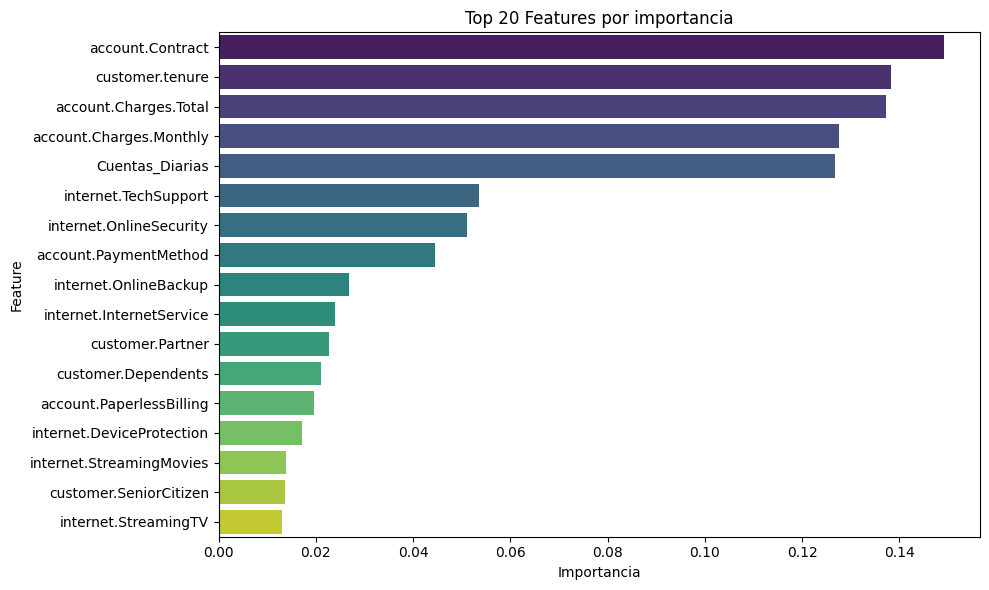

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=feat_imp.head(20),
    x="importance",
    y="feature",
    palette="viridis"
)
plt.title("Top 20 Features por importancia")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [126]:
feat_imp["cum_importance"] = feat_imp["importance"].cumsum()
selected_acc = feat_imp[feat_imp["cum_importance"] <= 0.80]["feature"].tolist()
print(f"Número de features para cubrir 80% de importancia: {len(selected_acc)}")
selected_acc

Número de features para cubrir 80% de importancia: 7


['account.Contract',
 'customer.tenure',
 'account.Charges.Total',
 'account.Charges.Monthly',
 'Cuentas_Diarias',
 'internet.TechSupport',
 'internet.OnlineSecurity']

In [128]:
# Filtrar columnas en X_train y X_test
X_train_sel = X_train[selected_acc]
X_test_sel  = X_test[selected_acc]

# Reentrenar
from sklearn.ensemble import RandomForestClassifier

rf_reduced = RandomForestClassifier(**rf_best.get_params())
rf_reduced.fit(X_train_sel, y_train)

# Evaluar
from sklearn.metrics import roc_auc_score

prueba_reduced = rf_reduced.predict_proba(X_test_sel)[:, 1]
print("AUC con features reducidas:", roc_auc_score(y_test, prueba_reduced))


AUC con features reducidas: 0.7985417536930848


AUC es mucho menor (0.7985) se continua con el modelo anterior (0.8208)

# 5. Serialización del modelo y pipeline completo para producción

## 5.1 Definir la lista de features seleccionadas

In [129]:
# Las 16 variables con mayor importancia
selected_numeric = [
    "customer.tenure",
    "account.Charges.Monthly",
    "account.Charges.Total",
    "Cuentas_Diarias"
]

selected_categorical = [
    "account.Contract",
    "internet.TechSupport",
    "internet.OnlineSecurity",
    "account.PaymentMethod",
    "internet.OnlineBackup",
    "internet.InternetService",
    "customer.Partner",
    "customer.Dependents",
    "account.PaperlessBilling",
    "internet.DeviceProtection",
    "internet.StreamingMovies",
    "customer.SeniorCitizen"
]

# Unión de todas las features
selected_features = selected_numeric + selected_categorical

## Construir el preprocesador

In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

numeric_transformer = StandardScaler()
categorical_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selected_numeric),
        ("cat", categorical_transformer, selected_categorical)
    ],
    remainder="drop"  # descartamos cualquier otra columna
)

Crear el pipeline completo

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Hiperparámetros obtenidos de GridSearchCV
best_params = {
    "n_estimators": 200,
    "max_depth": 20,
    "min_samples_leaf": 1,
    "class_weight": None,
    "random_state": 42
}

# Instanciar el clasificador optimizado
rf_best = RandomForestClassifier(**best_params)

# Pipeline que engloba preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", rf_best)
])

Entrenar el pipeline con el set de entrenamiento balanceado

In [135]:
df_limpio["Churn"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7032 entries, 0 to 7031
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 55.1 KB


In [136]:
# Asumiendo que X_sm y también y_sm provienen de SMOTE + escalado previo,
# y que X_train/X_test originales contienen todas las columnas de raw data:

# Aplicamos SMOTE sobre las variables seleccionadas
from imblearn.over_sampling import SMOTE

X_sel = df_limpio[selected_features]
y = df_limpio["Churn"]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_sel, y)

# Ahora entrenamos directamente el pipeline (incluye escalado/codificación)
pipeline.fit(X_res, y_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer.tenure',
                                                   'account.Charges.Monthly',
                                                   'account.Charges.Total',
                                                   'Cuentas_Diarias']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['account.Contract',
                                                   'internet.TechSupport',
                                                   'internet.OnlineSecurity',
                                                   'account.PaymentMethod',
                                                   'internet.OnlineBackup',
                                                   'internet.InternetService',
                                                   'customer.Partner',
                                                   'customer.Dependents',
                                                   'account.PaperlessBilling',
                                                   'internet.DeviceProtection',
                                                   'internet.StreamingMovies',
                                                   'customer.SeniorCitizen'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200,
                                        random_state=42))])

Serializar el pipeline con joblib

In [141]:
import joblib
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"telecomx_churn_pipeline_{timestamp}.joblib"

joblib.dump(pipeline, model_filename)
print("Pipeline serializado en:", model_filename)

Pipeline serializado en: telecomx_churn_pipeline_20250810_225000.joblib


Mapeo

Carga en producción y predicción

In [145]:
import joblib
import pandas as pd

# 1. Cargar el pipeline entrenado
loaded_pipeline = joblib.load("/content/telecomx_churn_pipeline.joblib")

# 2. Definir mapeos originales (código → etiqueta)
mappings = {
    "account.Contract": {
        0: "Month-to-month",
        1: "One year",
        2: "Two year"
    },
    "internet.TechSupport": {
        0: "No",
        1: "No internet service",
        2: "Yes"
    },
    "internet.OnlineSecurity": {
        0: "No",
        1: "No internet service",
        2: "Yes"
    },
    "account.PaymentMethod": {
        0: "Bank transfer (automatic)",
        1: "Credit card (automatic)",
        2: "Electronic check",
        3: "Mailed check"
    },
    "internet.OnlineBackup": {
        0: "No",
        1: "No internet service",
        2: "Yes"
    },
    "internet.InternetService": {
        0: "DSL",
        1: "Fiber optic",
        2: "No"
    },
    "customer.Partner": {
        0: "No",
        1: "Yes"
    },
    "customer.Dependents": {
        0: "No",
        1: "Yes"
    },
    "account.PaperlessBilling": {
        0: "No",
        1: "Yes"
    },
    "internet.DeviceProtection": {
        0: "No",
        1: "No internet service",
        2: "Yes"
    },
    "internet.StreamingMovies": {
        0: "No",
        1: "No internet service",
        2: "Yes"
    },
    "customer.SeniorCitizen": {
        0: "No",
        1: "Yes"
    }
}

# 3. Construir los mapeos inversos (etiqueta → código)
inverse_mappings = {
    col: {label: code for code, label in m.items()}
    for col, m in mappings.items()
}

# 4. Crear nuevo lote de datos con etiquetas de texto
new_data = pd.DataFrame([{
    "customer.tenure": 5,
    "account.Charges.Monthly": 75.50,
    "account.Charges.Total": 377.50,
    "Cuentas_Diarias": 75.50 / 5,
    "account.Contract": "Month-to-month",
    "internet.TechSupport": "No",
    "internet.OnlineSecurity": "Yes",
    "account.PaymentMethod": "Electronic check",
    "internet.OnlineBackup": "No",
    "internet.InternetService": "DSL",
    "customer.Partner": "Yes",
    "customer.Dependents": "No",
    "account.PaperlessBilling": "Yes",
    "internet.DeviceProtection": "No",
    "internet.StreamingMovies": "No",
    "customer.SeniorCitizen": "No"
}])

# 5. Convertir etiquetas a códigos numéricos solo en columnas de texto
new_data_encoded = new_data.copy()
for col, inv_map in inverse_mappings.items():
    if col in new_data_encoded.columns and new_data_encoded[col].dtype == object:
        new_data_encoded[col] = new_data_encoded[col].map(inv_map)

# 6. Predecir usando el pipeline cargado
probas = loaded_pipeline.predict_proba(new_data_encoded)[:, 1]
preds  = (probas >= 0.5).astype(int)

print("Datos codificados para el modelo:")
print(new_data_encoded.to_dict(orient="records")[0])
print("\nProbabilidades de churn:", probas)
print("Predicciones (0=no churn, 1=churn):", preds)

Datos codificados para el modelo:
{'customer.tenure': 5, 'account.Charges.Monthly': 75.5, 'account.Charges.Total': 377.5, 'Cuentas_Diarias': 15.1, 'account.Contract': 0, 'internet.TechSupport': 0, 'internet.OnlineSecurity': 2, 'account.PaymentMethod': 2, 'internet.OnlineBackup': 0, 'internet.InternetService': 0, 'customer.Partner': 1, 'customer.Dependents': 0, 'account.PaperlessBilling': 1, 'internet.DeviceProtection': 0, 'internet.StreamingMovies': 0, 'customer.SeniorCitizen': 0}

Probabilidades de churn: [0.32]
Predicciones (0=no churn, 1=churn): [0]
